In [1]:
# import pandas as pd
# import numpy as np
# import os.path
# from os import path
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# from IPython.display import display, Javascript
# from IPython.display import clear_output
# from ipywidgets import widgets          


In [12]:
# Data_file="2020-07-08_07-32.CSV"
# df=pd.read_csv(Data_file)
# df.head()

In [3]:
# tf['Time'].str.contains(r'\d+/\d+/\d+$')[0]

In [4]:
# tf['Time'].dtypes

In [5]:
# if (tf['Time'].dtypes=='O'):
#     print(tf['Time'].dtypes)
# else:
#     print("fuck")

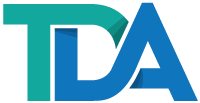
### <span style='color:BLACK'>  <span style='font-family:"Arial"'> DATA VIEWER V2 </span>
###### <span style='color:BLACK'> <span style='font-family:"Arial"'>Updated 12-20-21 - Brandon Gushlaw.</span>



In [1]:
import pandas as pd
import sys
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Javascript
from IPython.display import clear_output
import ipywidgets 
from ipywidgets import widgets



%matplotlib inline
%matplotlib widget 



tab = widgets.Tab()    
out = widgets.Output(layout={'border': '1px solid black'})
# out.layout.width='1000px'
# out.layout.height='1000px'
up = widgets.FileUpload(accept="", multiple=False)


pf=pd.DataFrame(columns=["Empty"])
pf2=pd.DataFrame(columns=["Empty"])
tf=pf

button = widgets.Button(description="Plot data")
button2 = widgets.Button(description="Add Y1")
button3 = widgets.Button(description="Remove Y1")
button4 = widgets.Button(description="Preview")
button5 = widgets.Button(description="Add Y2")
button6 = widgets.Button(description="Remove Y2")

Select=widgets.Select(
    options=list(tf),
    value=list(tf)[0],
    rows=10,
    description='Data',
    disabled=False
)

Select2=widgets.Select(
    options=list(pf),
    value=list(pf)[0],
    rows=10,
    description='Y-Axis',
    disabled=False
)

Select3=widgets.Select(
    options=list(pf2),
    value=list(pf2)[0],
    rows=10,
    description='Y-Axis2',
    disabled=False
)



delim = widgets.RadioButtons(
    options=[';', ',', ' '],
    description='Separator: ',
    disabled=False
)

eraser = widgets.SelectMultiple(
    options=['tab','"'],
    value=['tab'],
    #rows=10,
    description='Eraser: ',
    disabled=False
)

rows = widgets.IntSlider(
    value=0,
    step=1,
    description='# of lines:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

button_upload = widgets.Button(
    description='Upload',
    disabled=False,
    button_style='warning',
    tooltip='Click to Upload',
    icon='check'
)

button_preview = widgets.Button(
    description='Preview',
    disabled=False,
    button_style='info',
    tooltip='Click to Preview',
    icon='search'
)

button_plot = widgets.Button(
    description='Plot',
    disabled=False,
    button_style='danger',
    tooltip='Click to Plot',
    icon='pencil'
)

graph_type = widgets.Dropdown(
    options=['line','scatter','bar','barh','hist','box','kde','density','area','pie','hexbin'],
    value='line',
    description='Chart Type:',
    disabled=False,
)

legend_type = widgets.Dropdown(
    options=['none','upper right','upper left','center','lower left','lower right'],
    value='upper left',
    description='Legend Type:',
    disabled=False,
)

x_axis = widgets.Dropdown(
    options=[''],
    value='',
    description='X-Axis:',
    disabled=False,
)

y_axis = widgets.Dropdown(
    options=[''],
    value='',
    description='Y-Axis:',
    disabled=False,
)

color_picker = widgets.ColorPicker(
    concise=False,
    description='Color Picker: ',
    value='lightblue',
    disabled=False
)

toggle = widgets.ToggleButtons(
    options=['Preview  ', 'Info  ', 'Stats  '],
    description='Options',
    disabled=False,
    button_style='warning',
    icons=['search', 'info', 'tachometer']
)

def content_parser():
    if up.value == {}:
        with out:
            print('No CSV loaded')    
    else:
        typ, content = "", ""
        up_value = up.value
        for i in up_value.keys():
            typ = up_value[i]["metadata"]["type"]
            
            content = up_value[i]["content"]
            content_str = str(content, 'utf-8')
    
            if eraser.value != {}: 
                for val in eraser.value:
                    if val == "tab":
                         content_str = content_str.replace("\t","")
                    else:
                        content_str = content_str.replace(val,"")
            if content_str != "":
                str_io = StringIO(content_str) 
                return str_io
            
def df_converter():
    content = content_parser()
    if content is not None:
        
        df = pd.read_csv(content, sep=delim.value, index_col=False, skiprows=rows.value) 
        
        return df
    else:
        return None
def preview():
    df = df_converter()
    with out:
        out.clear_output()
        print('\n -----Now this is how your DF looks like:----- \n')
        if df is not None:
            print(df.head(10))
        else:
            print('Configuration is wrong/missing...1')
def upload():
    global tf
    df = df_converter()
    tf=df
    with out:
        out.clear_output()
        print('\n --------Your uploaded DF looks like:-------- \n')
        if df is not None:
            print(df)
            x_axis.options = df.columns
            y_axis.options = df.columns
            Select.options=list(df)
            
        else:
            print('Configuration is wrong/missing...2')
def desc():
    info_level = toggle.value
    if info_level != {}:
        df = df_converter()
        with out:
            out.clear_output()
            print('\n ------Your {} looks like:------ \n'.format(
                info_level))
            if df is not None:
                if info_level == 'Info  ':
                    print(df.info(verbose=True))
                elif info_level == 'Stats  ':
                    print(df.describe())
                elif info_level == 'Preview  ':
                    print(df.head(5))
                else:
                    print('Configuration is wrong/missing...')
    
    
def plot():
    global pf
    global pf2
    graph = graph_type.value
    if graph != {}:
        df = df_converter()
        with out:
            out.clear_output()
            print('\n ------Your {} looks like:------ \n'.format(
                graph))
            if (df is not None):
                if x_axis.value in pf:
                        DROP=x_axis.value
                        tf[DROP]=pf[DROP]
                        pf=pf.drop(columns=[DROP])
                        Select.options=list(tf)
                        Select2.options=list(pf)
                if x_axis.value in pf2:
                        DROP=x_axis.value
                        tf[DROP]=pf2[DROP]
                        pf2=pf2.drop(columns=[DROP])
                        Select.options=list(tf)
                        Select3.options=list(pf2)
                        
                if pf2.empty==True and pf.empty==False:
                        print('plotted single Y axis')
                        df.plot(kind=graph,x=x_axis.value,y=list(pf.columns),legend=True);
                        plt.legend(list(pf.columns),loc=legend_type.value)
                elif pf2.empty==False and pf.empty==False:
                    print('plotted secondary Y axis')
                    fig, ax1 = plt.subplots(1,1)
                    df.plot(ax=ax1,kind=graph,x=x_axis.value,y=list(pf.columns),legend=False);
                    ax2 = ax1.twinx()
                    df.plot(ax=ax2,kind=graph,x=x_axis.value,y=list(pf2.columns),secondary_y=True, legend=False);
#                     df[list(pf.columns)].plot(ax=ax1,kind=graph_type.value,x=x_axis.value,legend=False);
#                     ax2 = ax1.twinx()
#                     df[list(pf2.columns)].plot(ax=ax2,kind=graph_type.value,x=x_axis.value,secondary_y=True, legend=False);
                    ax1.set_ylabel('A scale')
                    ax2.right_ax.set_ylabel('BC scale')

                    h1, l1 = ax1.get_legend_handles_labels()
                    h2, l2 = ax2.right_ax.get_legend_handles_labels()
                    ax1.legend(h1+h2, l1+l2,loc=legend_type.value)
#                     ax1.legend((list(pf.columns)+list(pf2.columns)),loc=legend_type.value)
                    ax1.set_zorder(1)
                    ax1.patch.set_visible(False)
                    
                elif pf2.empty==True and pf.empty==True:
                    print("No data loading into the Y axis")

             
    
    

def add_clicked(b):
    global tf
    global pf
    ADD=Select.value
    pf[ADD]=tf[ADD]
    tf=tf.drop(columns=[ADD])
    if "Empty" in pf:
        pf=pf.drop(columns=["Empty"])
    
    Select.options=list(tf)
    Select2.options=list(pf)

    with out: 
        print("Added")
        
def drop_clicked(b):
    global tf
    global pf
    DROP=Select2.value
    tf[DROP]=pf[DROP]
    pf=pf.drop(columns=[DROP])
    Select.options=list(tf)
    Select2.options=list(pf)
    
def add_clicked2(b):
    global tf
    global pf2
    ADD=Select.value
    pf2[ADD]=tf[ADD]
    tf=tf.drop(columns=[ADD])
    if "Empty" in pf2:
        pf2=pf2.drop(columns=["Empty"])
        
    Select.options=list(tf)
    Select3.options=list(pf2)

    with out: 
        print("Added")
        
def drop_clicked2(b):
    global tf
    global pf2
    DROP=Select3.value
    tf[DROP]=pf2[DROP]
    pf2=pf2.drop(columns=[DROP])
    Select.options=list(tf)
    Select3.options=list(pf2)  
   
    with out:
        print("dropped")

                
def preview_clicked(b):
    preview()
def upload_clicked(b):
    upload()
def desc_clicked(b):
    desc()
def plotter_clicked(b):
    plot()

    
button_preview.on_click(preview_clicked)
button_upload.on_click(upload_clicked)
toggle.observe(desc_clicked, 'value')
button_plot.on_click(plotter_clicked)
button2.on_click(add_clicked)
button3.on_click(drop_clicked)
button5.on_click(add_clicked2)
button6.on_click(drop_clicked2)

accordion = widgets.Accordion(children=[
    up, 
    widgets.VBox([delim, eraser]), 
    rows])

accordion.set_title(0, 'File Selection')
accordion.set_title(1, 'Delimiter')
accordion.set_title(2, 'Skip Rows')

accordion_box = widgets.VBox([
    accordion, 
    widgets.HBox([button_preview, button_upload]),
    out
])

children = [
    accordion_box, 
    widgets.VBox([toggle, out]),
    widgets.VBox([
        widgets.HBox([graph_type,x_axis,legend_type]),
        widgets.HBox([button2,button3,button5,button6]),
        widgets.HBox([Select,Select2,Select3]), 
        button_plot,
        out
])]

tab.children = children
tab.set_title(0, "Upload")
tab.set_title(1, "Describer")
tab.set_title(2, "Plotter")
tab

In [2]:
# from ipywidgets import Layout, Button, VBox, Label

# item_layout = Layout(height='100px', min_width='40px')
# items = [Button(layout=item_layout, description=str(i), button_style='warning') for i in range(40)]
# box_layout = Layout(overflow='scroll hidden',
#                     border='3px solid black',
#                     width='500px',
#                     height='',
#                     flex_flow='row',
#                     display='flex')
# carousel = Box(children=items, layout=box_layout)
# VBox([Label('Scroll horizontally:'), carousel])

In [8]:
# {
#     "tags": [
#         "hide-input",
#     ]
# }